In [7]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [8]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2015-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY']

# Get 5 years of past data of portfolios
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [11]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [12]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987835,0.987797,0.990482,1.010476,1.006626,0.968551,0.994096,1.006992,0.992682,0.996636,...,1.007633,1.021965,0.998043,0.998968,1.014890,1.005025,1.012094,1.003528,1.006186,1.022050
2,0.986671,0.984112,1.003057,1.019968,1.010854,0.957965,0.992305,0.998788,0.981127,0.998753,...,1.012838,1.031914,1.005972,0.998853,1.033308,1.009855,1.015912,1.007116,1.001700,1.024322
3,0.999673,0.979039,1.022322,1.012356,1.005018,0.966857,0.994495,0.976302,0.987580,0.995712,...,1.006222,1.036189,0.991030,0.981175,1.029602,1.004884,1.005744,0.997970,1.003706,1.038334
4,1.011928,0.974913,1.038845,1.015826,1.015241,0.973949,1.005137,0.982271,0.992127,0.978641,...,0.995866,1.025191,0.966337,0.989638,1.049539,0.997072,1.008120,0.995888,1.010191,1.041679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.405182,1.956248,2.897921,1.597307,0.588261,2.148150,2.227745,1.380311,1.864342,1.134789,...,1.524558,0.733265,1.711833,1.257774,1.558277,1.283983,1.411023,1.862015,1.980786,2.741520
1257,1.420622,1.969506,2.903780,1.617804,0.578922,2.131560,2.192033,1.416287,1.824406,1.108632,...,1.550923,0.724296,1.709782,1.268424,1.550761,1.267723,1.416139,1.836506,2.000576,2.790287
1258,1.437810,1.982521,2.870419,1.638701,0.569365,2.126433,2.193870,1.428867,1.792822,1.122093,...,1.574261,0.717439,1.676432,1.252642,1.574636,1.246360,1.385660,1.857162,2.003410,2.838212
1259,1.436234,2.057685,2.914834,1.646783,0.574807,2.146257,2.219084,1.431966,1.779471,1.116157,...,1.589499,0.713554,1.646663,1.272429,1.557618,1.246131,1.388291,1.853604,2.019473,2.831117


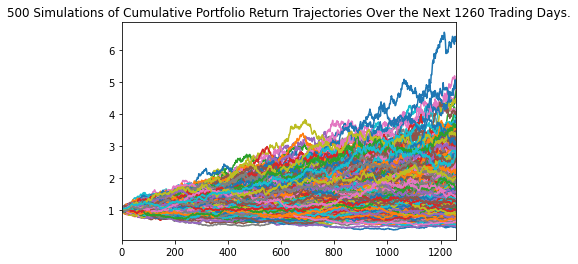

In [14]:
line_plot = MC_fiveyear.plot_simulation()
line_plot.get_figure().savefig("MonteCarlo_5yrs_SPY_simulation.png", bbox_inches="tight")

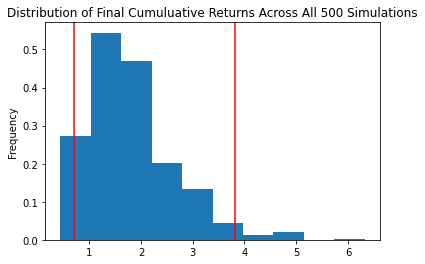

In [15]:
dist_plot = MC_fiveyear.plot_distribution()
line_plot.get_figure().savefig("MonteCarlo_5yrs_SPY_dist.png", bbox_inches="tight")

In [16]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.813484
std               0.835550
min               0.441413
25%               1.242403
50%               1.662819
75%               2.202477
max               6.323388
95% CI Lower      0.701996
95% CI Upper      3.825593
Name: 1260, dtype: float64


In [17]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(summary[8]*10000,2)
ci_upper = round(summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $7019.96 and $38255.93
